In [1]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import pandas as pd
import numpy as np
from IPython.display import Image
from sklearn.metrics import classification_report,confusion_matrix
import pydotplus
import graphviz
pydotplus.find_graphviz()
from six import StringIO

**Loading Dataset**

We are using Iris dataset from sklearn.datasets for this classification task.

In [ ]:
iris = datasets.load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


**Data Understanding**


In [ ]:
df.target.value_counts()

0.0    50
1.0    50
2.0    50
Name: target, dtype: int64

This data set contains 3 classes with 50 data points each.

In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Data ranges of the 4 features, seems to be similar.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


Data doesnot contains any null values, also having the proper datatypes.

**Creating train-test split**

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,random_state=1)
print(X_train.shape)

(112, 4)


**Training Decision tree-No hyper parameters**

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

**Visualizing Decision trees**

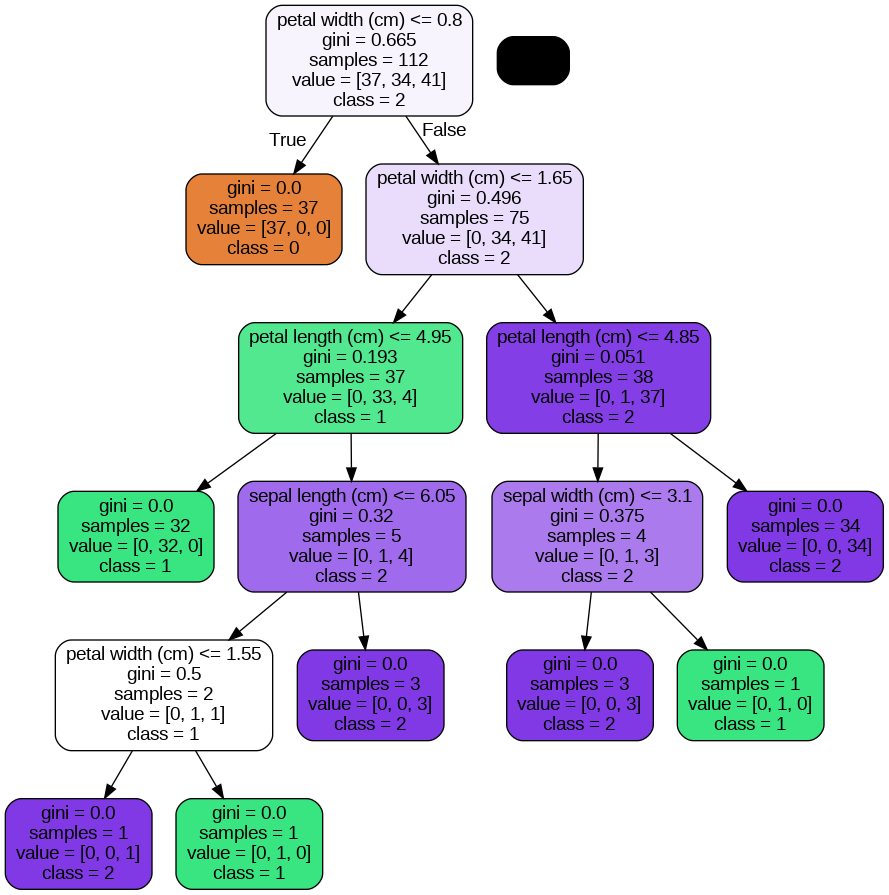

In [ ]:

dot_data = StringIO()

export_graphviz(clf, out_file=dot_data, filled=True, rounded=True,
                feature_names=df.columns[:-1],
                class_names=['0','1','2'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

**Evaluation**

In [ ]:
y_train_pred =clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [ ]:
confusion_matrix(y_train,y_train_pred)

array([[37,  0,  0],
       [ 0, 34,  0],
       [ 0,  0, 41]])

In [ ]:
confusion_matrix(y_test,y_test_pred)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

Confusion matrix in test set has only one miss-classified data

In [ ]:
print(classification_report(y_test, y_test_pred, target_names=['0','1','2']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



f1-score for each class is greater than 0.95 in test set. Therefore this is a good model.

**Training Decision trees with Hyper parameters**

In [ ]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

**Visualizing Decision Trees**

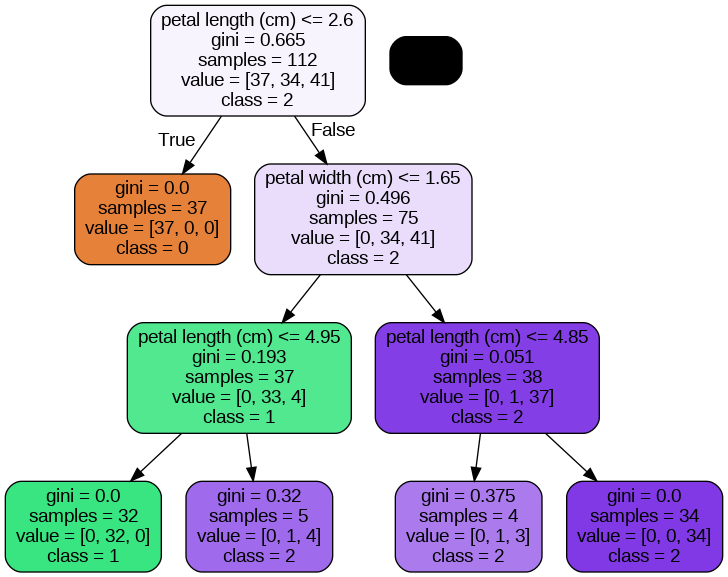

In [ ]:
from six import StringIO
dot_data = StringIO()

export_graphviz(clf, out_file=dot_data, filled=True, rounded=True,
                feature_names=df.columns[:-1],
                class_names=['0','1','2'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

We can see the generated decision tree is having a depth of 3

**Evaluation**

In [ ]:
y_train_pred =clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [ ]:
confusion_matrix(y_train,y_train_pred)

array([[37,  0,  0],
       [ 0, 32,  2],
       [ 0,  0, 41]])

In [ ]:
confusion_matrix(y_test,y_test_pred)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

The confusion matrix shows the test set contains only one miss-classified data. And train set contains 2 miss-classified data. By reducing the complexity of the model we have achieved similar performance ont he test set and reduced over fitting on the train set.

In [ ]:
print(classification_report(y_test, y_test_pred, target_names=['0','1','2']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



We got similar result as the pervious model.